# Semantic Factors
This notebook aims for an exploratory factor analysis of "The Glasgow Norm" -- a database with 5.553 English words classified into nine psycholinguistics dimensions. The objetive in doing such an analysis is to find out empirical support for the theoretical segmentation of the semantic content, which are believed to have an objective portion and a subjective portion.

## Introduction

### Libraries

In [2]:
## Data analysis packages:
import pandas as pd
import numpy as np
from math import isnan  #Verifies if a given valu e is numerical.

In [3]:
## Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Plotly Express
import plotly.graph_objs as go
import plotly

### Definitions

In [5]:
## Forcing Pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_seq_items = 15000

## DataPrep

### Importing "The Glasgow Norms" dataset
Available at https://doi.org/10.3758/s13428-018-1099-3.  
The Glasgow Norms are a set of normative ratings for 5,553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

In [6]:
## Reading the dataset file:
## -> header=[0,1] parameters indicates that rows [0,1] must be considered as dataset header.
glasgow = pd.read_csv('./dataset_GlasgowR/(Glasgow Norms Ratings - Sup Material) 13428_2018_1099_MOESM2_ESM.csv',
                     header=[0,1])

In [7]:
glasgow.head(2)

,Words,Length,AROU,Unnamed: 3_level_0,Unnamed: 4_level_0,VAL,Unnamed: 6_level_0,Unnamed: 7_level_0,DOM,Unnamed: 9_level_0,Unnamed: 10_level_0,CNC,Unnamed: 12_level_0,Unnamed: 13_level_0,IMAG,Unnamed: 15_level_0,Unnamed: 16_level_0,FAM,Unnamed: 18_level_0,Unnamed: 19_level_0,AOA,Unnamed: 21_level_0,Unnamed: 22_level_0,SIZE,Unnamed: 24_level_0,Unnamed: 25_level_0,GEND,Unnamed: 27_level_0,Unnamed: 28_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N,M,SD,N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33


#### DataPrep: adjusting the column/feature label

In [8]:
## Reading the dataset file, but now discarding the first header row:
glasgow = pd.read_csv('./dataset_GlasgowR/(Glasgow Norms Ratings - Sup Material) 13428_2018_1099_MOESM2_ESM.csv',
                     header=[1])

In [9]:
glasgow.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'M', 'SD', 'N', 'M.1', 'SD.1', 'N.1', 'M.2',
       'SD.2', 'N.2', 'M.3', 'SD.3', 'N.3', 'M.4', 'SD.4', 'N.4', 'M.5',
       'SD.5', 'N.5', 'M.6', 'SD.6', 'N.6', 'M.7', 'SD.7', 'N.7', 'M.8',
       'SD.8', 'N.8'],
      dtype='object')

In [10]:
glasgow.columns = ['words', 'length', 
                   'AROU_M', 'AROU_SD', 'AROU_N',
                   'VAL_M', 'VAL_SD', 'VAL_N',
                   'DOM_M', 'DOM_SD', 'DOM_N',
                   'CNC_M', 'CNC_SD', 'CNC_N',
                   'IMAG_M', 'IMAG_SD', 'IMAG_N',
                   'FAM_M', 'FAM_SD', 'FAM_N',
                   'AOA_M', 'AOA_SD', 'AOA_N',
                   'SIZE_M', 'SIZE_SD', 'SIZE_N',
                   'GEND_M', 'GEND_SD', 'GEND_N']

In [11]:
glasgow.head()

,words,length,AROU_M,AROU_SD,AROU_N,VAL_M,VAL_SD,VAL_N,DOM_M,DOM_SD,DOM_N,CNC_M,CNC_SD,CNC_N,IMAG_M,IMAG_SD,IMAG_N,FAM_M,FAM_SD,FAM_N,AOA_M,AOA_SD,AOA_N,SIZE_M,SIZE_SD,SIZE_N,GEND_M,GEND_SD,GEND_N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33
2,abbreviate,10,3.273,1.582,33,5.250,1.031,32,5.235,1.238,34,3.286,1.733,35,3.177,1.689,34,5.121,1.838,33,5.543,1.130,35,2.667,1.700,33,3.971,0.954,34
3,abdicate,8,4.194,1.941,31,3.767,1.383,30,4.419,2.182,31,3.367,1.853,30,2.516,1.521,31,3.971,2.077,35,6.233,0.844,30,4.679,1.441,28,5.167,1.186,30
4,abdication,10,3.846,2.282,26,3.880,1.608,25,4.800,1.960,25,3.292,1.620,24,2.571,1.294,28,3.097,2.022,31,6.407,0.913,27,5.083,1.351,24,4.571,1.015,28


In [12]:
## Exportando o dataframe ajustado para um arquivo CSV:
#glasgow.to_csv('./dataset_GlasgowR/GlasgowR_pandas_ready.csv')

In [13]:
glasgow

,words,length,AROU_M,AROU_SD,AROU_N,VAL_M,VAL_SD,VAL_N,DOM_M,DOM_SD,DOM_N,CNC_M,CNC_SD,CNC_N,IMAG_M,IMAG_SD,IMAG_N,FAM_M,FAM_SD,FAM_N,AOA_M,AOA_SD,AOA_N,SIZE_M,SIZE_SD,SIZE_N,GEND_M,GEND_SD,GEND_N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33
2,abbreviate,10,3.273,1.582,33,5.250,1.031,32,5.235,1.238,34,3.286,1.733,35,3.177,1.689,34,5.121,1.838,33,5.543,1.130,35,2.667,1.700,33,3.971,0.954,34
3,abdicate,8,4.194,1.941,31,3.767,1.383,30,4.419,2.182,31,3.367,1.853,30,2.516,1.521,31,3.971,2.077,35,6.233,0.844,30,4.679,1.441,28,5.167,1.186,30
4,abdication,10,3.846,2.282,26,3.880,1.608,25,4.800,1.960,25,3.292,1.620,24,2.571,1.294,28,3.097,2.022,31,6.407,0.913,27,5.083,1.351,24,4.571,1.015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,zeppelin,8,6.185,2.037,27,5.000,1.414,27,5.333,1.743,27,6.286,0.920,28,6.185,1.123,27,3.167,2.115,30,6.036,0.944,28,5.464,1.721,28,5.269,1.021,26
5549,zero,4,4.031,2.023,32,4.182,1.585,33,4.567,2.124,30,2.688,1.895,32,3.903,2.347,31,6.269,1.195,26,2.636,1.123,33,1.758,1.393,33,4.172,0.647,29
5550,zest,4,5.969,2.158,32,6.818,1.313,33,6.121,1.320,33,4.438,1.694,32,4.033,1.622,30,4.000,1.626,31,5.364,1.123,33,2.636,1.738,33,3.452,1.011,31
5551,zoo,3,5.909,2.137,33,6.235,1.800,34,5.485,1.598,33,6.118,1.105,34,6.441,1.006,34,5.655,1.747,29,2.324,0.674,34,4.844,1.873,32,4.059,0.802,34


### Setting the columns "words" as dataframe index:

In [14]:
glasgow.set_index('words', inplace=True)

----
## Correlation Analysis of the mean of psycholinguistics dimensions

### Selecting only columns related to _M (mean) for Correlation Analysis

In [24]:
import re

In [25]:
## Listing only columns related to _M (mean) and _SD (standard deviation)
interest = ['AROU_M', 'AROU_SD',
                   'VAL_M', 'VAL_SD',
                   'DOM_M', 'DOM_SD',
                   'CNC_M', 'CNC_SD',
                   'IMAG_M', 'IMAG_SD',
                   'FAM_M', 'FAM_SD',
                   'AOA_M', 'AOA_SD',
                   'SIZE_M', 'SIZE_SD',
                   'GEND_M', 'GEND_SD']

In [26]:
tmp_pattern = re.compile(r'.*_M$')
tmp_M_parameters = list(filter(tmp_pattern.match, interest))

print(tmp_M_parameters)

['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']


In [27]:
M_words = glasgow[tmp_M_parameters]

In [28]:
M_words

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571
...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452


<AxesSubplot: >

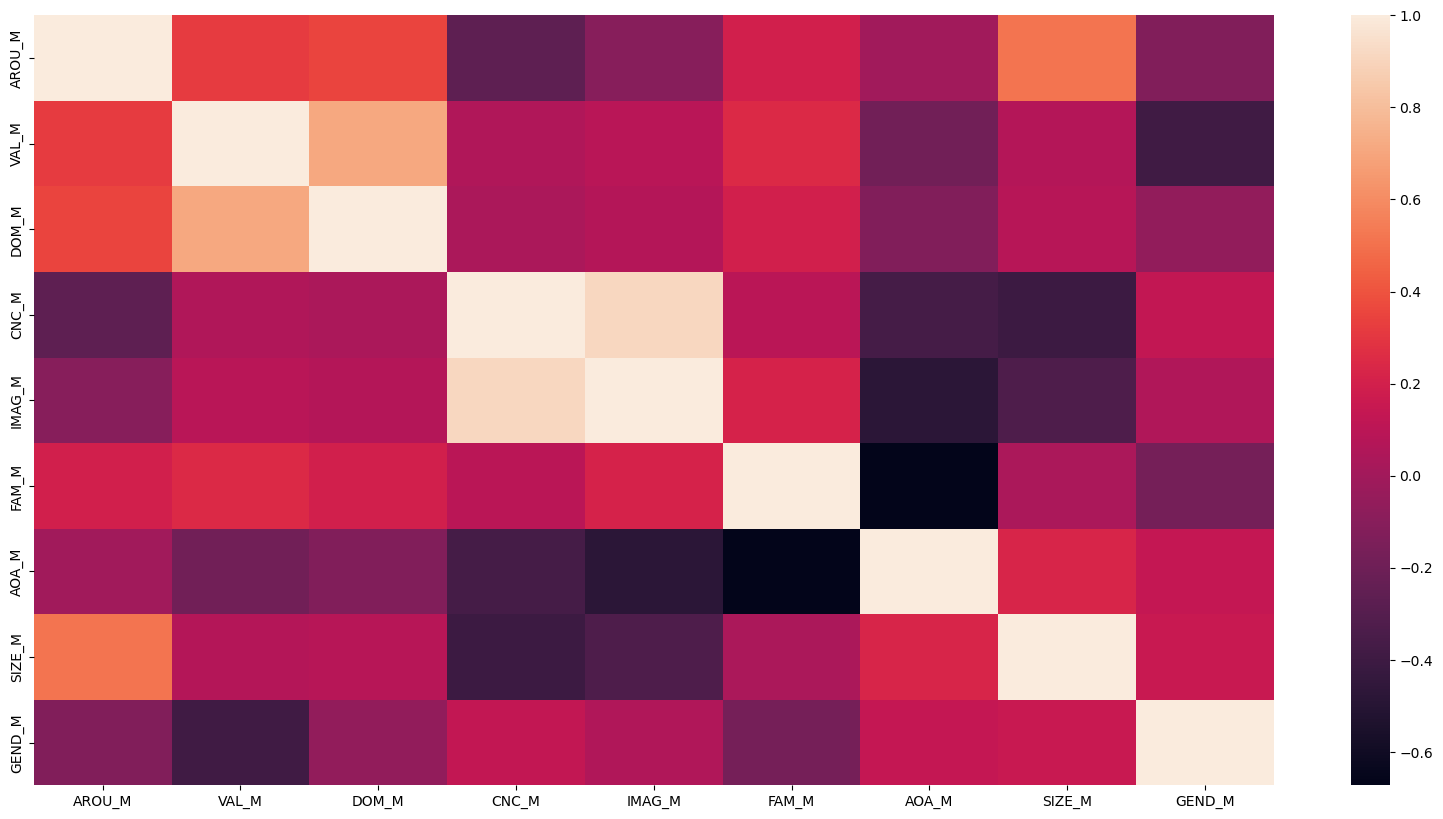

In [29]:
## Plotting the correlation map only for Mean values
plt.figure(figsize=(20,10))
c= M_words.corr()
sns.heatmap(c)

-----
### Visualizing features with confidence interval:

In [56]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf


def viz_GlasgowR(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

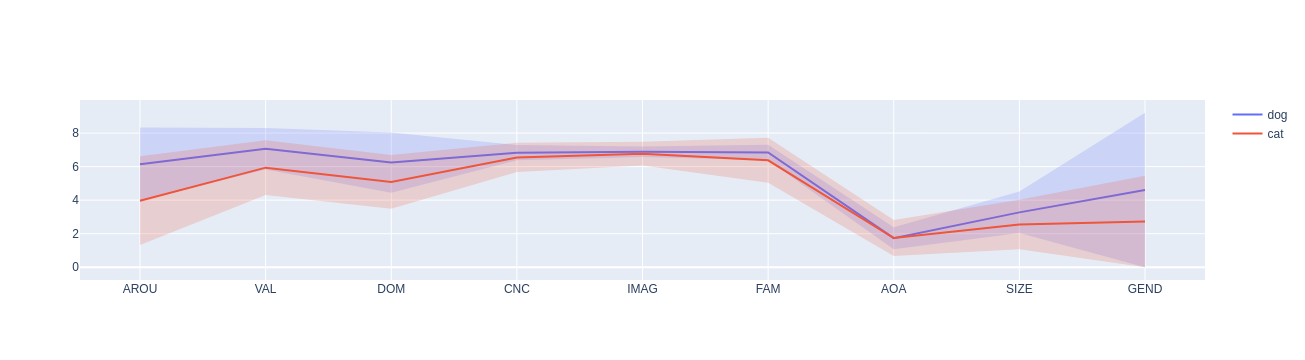

In [61]:
viz_GlasgowR(words=['dog', 'cat'], dataframe=glasgow)

> Experimenting some words visualization:

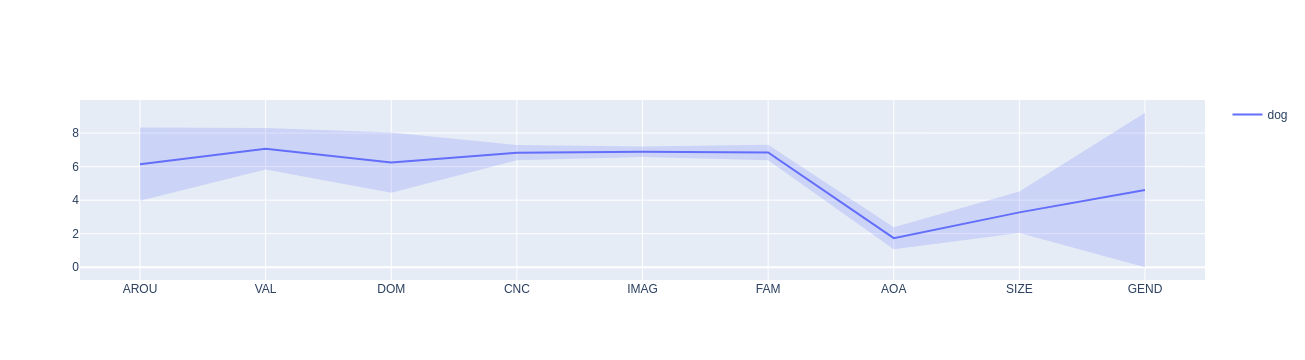

In [62]:
fig_dog = viz_GlasgowR(['dog'], glasgow)
fig_dog

> Eduardo B.Nion sugeriu as palavras "snake" e "dog".  
> Considerar determinados símbolos, ou palavras que já têm reações conhecidas.

In [70]:
## Showing the interest attributes for the words SNAKE and DOG:
glasgow.loc[['snake', 'dog'],interest]

,AROU_M,AROU_SD,VAL_M,VAL_SD,DOM_M,DOM_SD,CNC_M,CNC_SD,IMAG_M,IMAG_SD,FAM_M,FAM_SD,AOA_M,AOA_SD,SIZE_M,SIZE_SD,GEND_M,GEND_SD
words,,,,,,,,,,,,,,,,,,
snake,4.909,2.366,3.657,1.620,5.257,2.047,6.714,0.700,6.657,0.630,5.647,1.473,2.529,0.947,3.091,1.621,5.200,1.064
dog,6.147,2.185,7.067,1.237,6.242,1.793,6.833,0.453,6.889,0.314,6.840,0.463,1.735,0.656,3.273,1.238,4.606,0.983


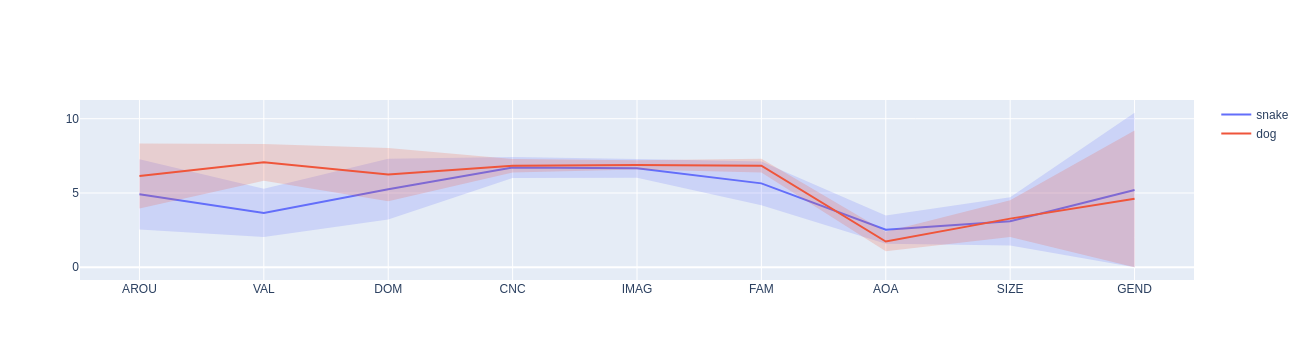

In [71]:
viz_GlasgowR(['snake','dog'], glasgow)

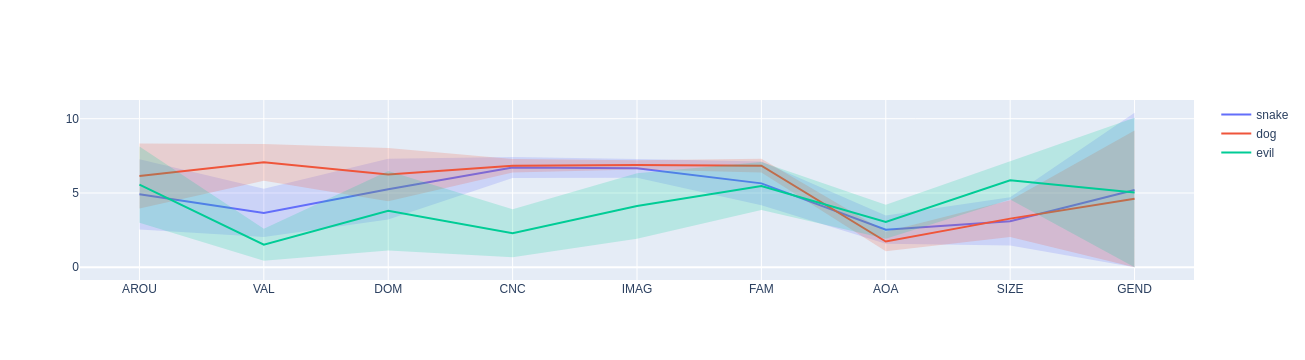

In [72]:
viz_GlasgowR(['snake','dog','evil'], glasgow)

----
# Factor Analysis
Based on the https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42.
> It is not a well-explained tutorial. I should run on better references.  

This tutorial is too much better: https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729

In [78]:
from factor_analyzer import FactorAnalyzer

In [85]:
## Selecting a subset of the original dataframe with only the columns of interest:
x = glasgow[interest]

In [88]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()
fa.fit(x)

FactorAnalyzer(rotation_kwargs={})

In [90]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([4.02972451, 2.85173865, 2.12765386, 1.66930325, 1.03181101,
       0.9287536 , 0.85908292, 0.77387255, 0.69975675, 0.65776309,
       0.53647903, 0.45435691, 0.39393876, 0.32090067, 0.24880754,
       0.18100583, 0.17206412, 0.06298696])

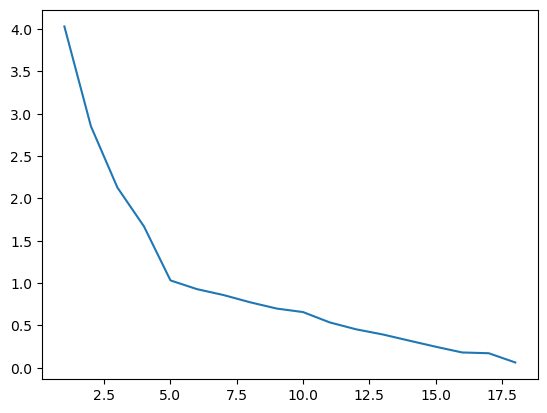

In [91]:
plt.plot(range(1,x.shape[1]+1),ev)

> Choosing 3 factors (> than 2).
>> Although I would like to have just 2 -> objective and subjective.

In [92]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.2196767  -0.42193621  0.49565417]
 [-0.08479963  0.21214852  0.4983762 ]
 [ 0.02950145 -0.58137607 -0.12411682]
 [ 0.04055816  0.02200477  0.50497482]
 [ 0.02983049 -0.48132043 -0.0347337 ]
 [ 0.14663998  0.03278142  0.72370193]
 [-0.90949908  0.05674633 -0.10940747]
 [ 0.63682151  0.0463172   0.17894118]
 [-0.90443033 -0.08364974  0.00856601]
 [ 0.76243091  0.18860328  0.09060709]
 [-0.21474498 -0.73953612  0.0794164 ]
 [ 0.06653418  0.74434252  0.00610577]
 [ 0.46954034  0.55661693  0.10343042]
 [ 0.08616676  0.27399423 -0.00344966]
 [ 0.38621167 -0.13420484  0.55261293]
 [-0.14866246  0.15725659  0.21835489]
 [-0.09463099  0.31618722  0.18593306]
 [ 0.09294658  0.03701935  0.32942048]]


### Analyzing the factor structure:

In [98]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2','Factor 3'], index=[x.columns])

In [97]:
def highlight_high_values(val):
    color = 'background-color: yellow' if val > 0.5 else ''
    return color

In [102]:
factors.style.applymap(highlight_high_values)

,Factor 1,Factor 2,Factor 3
AROU_M,0.219677,-0.421936,0.495654
AROU_SD,-0.084800,0.212149,0.498376
VAL_M,0.029501,-0.581376,-0.124117
VAL_SD,0.040558,0.022005,0.504975
DOM_M,0.029830,-0.481320,-0.034734
DOM_SD,0.146640,0.032781,0.723702
CNC_M,-0.909499,0.056746,-0.109407
CNC_SD,0.636822,0.046317,0.178941
IMAG_M,-0.904430,-0.083650,0.008566
IMAG_SD,0.762431,0.188603,0.090607


## Evaluating the factors through Cronbach alpha measurement:

In [93]:
import pingouin as pg

In [93]:
#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

NameError: name 'df' is not defined

In [104]:
glasgow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, abattoir to zoology
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   5553 non-null   int64  
 1   AROU_M   5553 non-null   float64
 2   AROU_SD  5553 non-null   float64
 3   AROU_N   5553 non-null   int64  
 4   VAL_M    5553 non-null   float64
 5   VAL_SD   5553 non-null   float64
 6   VAL_N    5553 non-null   int64  
 7   DOM_M    5553 non-null   float64
 8   DOM_SD   5553 non-null   float64
 9   DOM_N    5553 non-null   int64  
 10  CNC_M    5553 non-null   float64
 11  CNC_SD   5553 non-null   float64
 12  CNC_N    5553 non-null   int64  
 13  IMAG_M   5553 non-null   float64
 14  IMAG_SD  5553 non-null   float64
 15  IMAG_N   5553 non-null   int64  
 16  FAM_M    5553 non-null   float64
 17  FAM_SD   5553 non-null   float64
 18  FAM_N    5553 non-null   int64  
 19  AOA_M    5553 non-null   float64
 20  AOA_SD   5553 non-null   float64
 21  AOA_N    

---------
---------
# BACKUP

------
### Experimento com Prof. Heitor

In [ ]:
label_M

In [ ]:
dataset = words[label_M]

In [ ]:
dataset

#### Definição das frases

In [ ]:
data_sick.loc[1733]

In [ ]:
words.loc['dangerous']

In [ ]:
frase_A = pd.DataFrame([words.loc['dog'],words.loc['ugly']])

In [ ]:
frase_B = pd.DataFrame([words.loc['snake'],words.loc['dangerous']])

In [ ]:
frase_A

In [ ]:
frase_A.describe()

In [ ]:
frase_A.describe().loc['mean']

In [ ]:
frase_B.describe()

### Medida de proximidade semântica

Frases similares:
1. The **dog** is **ugly**.
2. That **dog** is **awful** and **horrible**.

Frases diferentes:  
3. The **snake** is **dangerous**.
4. **Love** is **beautiful**.  



Tarefa:
- Pegar as 8 dimensões médias para cada uma das palavras destacadas.
- Fazer a média dessas medidas.

> Frase 1: "the dog is ugly"

In [ ]:
## Recuperando as 8 dimensões das palavras da frase:
df_frase1 = dataset.loc[['dog','ugly']]
df_frase1

In [ ]:
## Calculando a média das palavras que compõem a frase:
vetor_frase1 = df_frase1.describe().loc['mean']
vetor_frase1 = np.array(vetor_frase1).T.tolist()
vetor_frase1

> A mesma operação para a frase "that dog is awful and horrible".

In [ ]:
## Recuperando as 8 dimensões das palavras da frase:
df_frase2 = dataset.loc[['dog','awful','horrible']]
df_frase2 

In [ ]:
## Calculando a média das palavras que compõem a frase:
vetor_frase2 = df_frase2.describe().loc['mean']
vetor_frase2 = np.array(vetor_frase2).T.tolist()
vetor_frase2

> Frase 3: "the snake is dangerous."

In [ ]:
## Recuperando as 8 dimensões das palavras da frase:
df_frase3 = dataset.loc[['snake','dangerous']]
df_frase3 

In [ ]:
## Calculando a média das palavras que compõem a frase:
vetor_frase3 = df_frase3.describe().loc['mean']
vetor_frase3 = np.array(vetor_frase3).T.tolist()
vetor_frase3

> Frase 4: "love is beautiful."

In [ ]:
## Recuperando as 8 dimensões das palavras da frase:
df_frase4 = dataset.loc[['love','beautiful']]
df_frase4 

In [ ]:
## Calculando a média das palavras que compõem a frase:
vetor_frase4 = df_frase4.describe().loc['mean']
vetor_frase4 = np.array(vetor_frase4).T.tolist()
vetor_frase4

#### Calculando a distância entre os vetores:

In [ ]:
from scipy.spatial import distance

In [ ]:
## Dist v1 e v2
distance.euclidean(vetor_frase1, vetor_frase2)

In [ ]:
## Dist v1 e v3
distance.euclidean(vetor_frase1, vetor_frase3)

In [ ]:
## Dist v2 e v3
distance.euclidean(vetor_frase2, vetor_frase3)

In [ ]:
## Dist v4 e v3
distance.euclidean(vetor_frase4, vetor_frase3)

In [ ]:
## Dist v4 e v2
distance.euclidean(vetor_frase4, vetor_frase2)

-----
## Análise sintática (POS - Part Of Speech)
Com base no tutorial disposto em https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools.  

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

- Noun (NN)- Joseph, London, table, cat, teacher, pen, city
- Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
- Adjective(JJ)- beautiful, happy, sad, young, fun, three
- Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
- Preposition (IN)- at, on, in, from, with, near, between, about, under
- Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
- Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
- Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

In [ ]:
phrase = 'Love is something beautiful.'

Also using Spacy library: https://spacy.io/

In [ ]:
#!pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy

In [ ]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

In [ ]:
phrase = "The cat is on the table"

In [ ]:
doc = nlp(phrase)

In [ ]:
spacy.displacy.render(doc, style='dep', jupyter=True, options={'distance':90})

-----

In [ ]:
import nltk
from nltk import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
tokens=word_tokenize(phrase)
nltk.pos_tag(tokens)

## 2022.04.28 - Discussão com Andrei

### Qual é o problema? 
- Queremos medir a similaridade de duas coisas.
- Se a métrica utilizada, o valor for o mesmo, podemos presumir que o significado pode ser semelhante.  

#### Semantica:
- Objetiva: sintática (Spacy)
- Subjetiva: ... psicometria. (como foi determinado o ACF??)

#### **Objetivo:** questionamentos do Andrei

- Conseguimos avaliar os atributos (ACF) de uma sentença??
    - Supondo que consigo avaliá-los, o que é possível extrair deles? 
    - É relevante?? Qual é a interpretabilidade da métrica? 
        - Por que essa sentença é mais próxima da outra?

- Ou conseguimos extrair features das frases a partir dos atributos (ACF)?

### Segundo experimento:
Faltou no The Glasgow Norm alguma palavra ou verbo... Como a gente conseguiria contornar essa situação? 

1. Utilizar um word embedding para achar o termo mais próximo àquele que não foi encontrado e aí utilizar por referência...  

2. (Com a premissa de que funcionaria o word embedding) Seria possível expandir o "Glasgow Norm" para um número maior de termos?  

https://colab.research.google.com/github/bentrevett/pytorch-sentiment-analysis/blob/master/B%20-%20A%20Closer%20Look%20at%20Word%20Embeddings.ipynb  

word_vector = get_vector(glove, 'india')

closest_words(glove, word_vector)

### The cat:

- A cat is chasing a dog
- A cat chases a dog
- A cat is chasing around a german shepherd dog more than twice its size
- A cat is scaring away a dog
- A cat chases a large dog around the yard
- ERRADA: A dog is chasing a cat
- CERTA: A cat is running after a dog


In [ ]:
p1 = 'a cat is chasing a dog'
p2 = 'A dog is chasing a cat'
p3 = 'A cat is running after a dog'

In [ ]:
doc = nlp(p1)
spacy.displacy.render(doc, style='dep', jupyter=True, options={'distance':90})

In [ ]:
doc = nlp(p3)
spacy.displacy.render(doc, style='dep', jupyter=True, options={'distance':90})

-> Substituir "cat" por "kant"... 

### Man sweeping

REFERENCIAS

A man sweeps the floor of a gym
A man sweeps the gymnasium floor with a dust broom
A man in a blue shirt and black trousers sweeping a gym floor
A man in a blue shirt is sweeping a classroom
A man in black pants is mopping the floor of a gym room

ERRADO: A man in a blue shirt and black pants is working out in a gym
CERTO: A person is mopping the gym floor

### Man driving

A man is driving a car

A man driving a car

A person walks with thick boots through the rough ways
There is someone advertising some boots
A man is walking in the forest area
A person walks wearing a black trecking shore and climbed a snow mountain
Person is showing his new boots and their advantages
A pair of gray hiking boots are shown as the narrator states boots are the most important part of hiking
A guy is using boots to hike in the snow

ERRADA: A pair of gray hiking boots is showing the forest area
CERTA: A pair of hiking boots are shown and then a man walks along the snowy forest

## Next steps

(Ver notas no EverNote)

In [ ]:
## Considerando o desvio padrão na frase 4:
words.loc[['love','beautiful']]

## Visualizing App

In [ ]:
import plotly.graph_objects as go # or plotly.express as px
# fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

In [ ]:
### Activating a Plotly Dash server
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

## Uncomment the line below:
# app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter